In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA  # Uncomment if PCA is needed
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os
import cv2


In [9]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

        

In [10]:
import os
print("Current folder is:", os.getcwd())


Current folder is: C:\Users\gauri


In [11]:
import os
import cv2


dir_name = r"C:\Users\gauri\Downloads\dataset\dataset\faces"
X = []
y = []
target_names = []

person_id = 0
h, w = 300, 300
n_samples = 0
class_names = []

# Valid image extensions
valid_exts = ['.jpg', '.jpeg', '.png', '.bmp']

for person_name in os.listdir(dir_name):
    dir_path = os.path.join(dir_name, person_name)

    if not os.path.isdir(dir_path):
        continue  # skip if it's not a folder

    class_names.append(person_name)

    for image_name in os.listdir(dir_path):
        # Check if it's an image file
        if not any(image_name.lower().endswith(ext) for ext in valid_exts):
            continue

        image_path = os.path.join(dir_path, image_name)
        img = cv2.imread(image_path)

        if img is None:
            print(f"Failed to read: {image_path}")
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray, (h, w))
        X.append(resized_image.flatten())
        y.append(person_id)
        target_names.append(person_name)
        n_samples += 1

    person_id += 1

print(f"✅ Loaded {n_samples} images from {len(class_names)} classes.")

import numpy as np

# Example: X is your feature matrix (images as flattened vectors)
# y is the label list (person IDs), target_names is list of names

# Convert to numpy arrays if not already
X = np.array(X)
y = np.array(y)
target_names = np.array(target_names)

# Shape info
n_samples, n_features = X.shape
n_classes = target_names.shape[0]

# Print dataset summary
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

# Example output shape printing (optional)
print("X shape:", X.shape)
print("y shape:", y.shape)
print("target_names shape:", target_names.shape)


✅ Loaded 450 images from 9 classes.
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 450
X shape: (450, 90000)
y shape: (450,)
target_names shape: (450,)


Extracting the top 150 eigenfaces from 337 faces
Extracting the top 150 eigenfaces from 337 faces


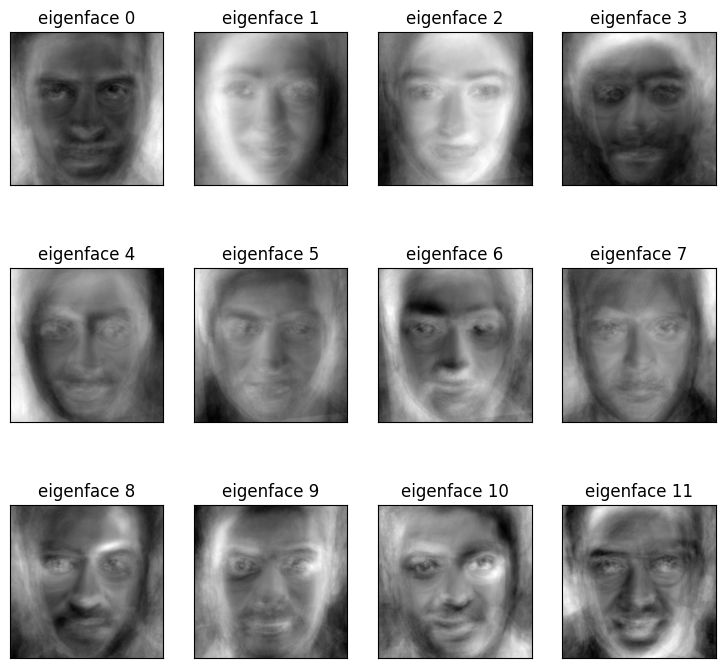

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
Project done...


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Define the number of principal components (eigenfaces)
n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

# Apply PCA to training data
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
# Apply PCA (eigenfaces) on the face dataset (treated as unlabeled dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

# Applying PCA
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

# Generating eigenfaces
eigenfaces = pca.components_.reshape((n_components, h, w))

# plot the gallery of the most significant eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)

# Compute Fisherfaces
lda = LinearDiscriminantAnalysis()

# Compute LDA of reduced data
lda.fit(X_train_pca, y_train)

X_train_lda = lda.transform(X_train_pca)
lda = LinearDiscriminantAnalysis()

# Compute LDA of reduced data
lda.fit(X_train_pca, y_train)

X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)

print("Project done...")


In [13]:
from sklearn.neural_network import MLPClassifier

# Initialize the model
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(50, 50), solver='adam', verbose=True, max_iter=300, alpha=1e-4)

# Fit the model
clf.fit(X_train_lda, y_train)  # Replace with your actual training data

# Now you can safely access model weights
print("Model Weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)


Iteration 1, loss = 2.69185185
Iteration 2, loss = 2.49206223
Iteration 3, loss = 2.31594153
Iteration 4, loss = 2.14938795
Iteration 5, loss = 1.99608220
Iteration 6, loss = 1.85824499
Iteration 7, loss = 1.73450216
Iteration 8, loss = 1.62083852
Iteration 9, loss = 1.51454782
Iteration 10, loss = 1.41795627
Iteration 11, loss = 1.32704816
Iteration 12, loss = 1.24193655
Iteration 13, loss = 1.16397733
Iteration 14, loss = 1.09076761
Iteration 15, loss = 1.02354742
Iteration 16, loss = 0.96044405
Iteration 17, loss = 0.90169114
Iteration 18, loss = 0.84584893
Iteration 19, loss = 0.79544634
Iteration 20, loss = 0.74699613
Iteration 21, loss = 0.70247849
Iteration 22, loss = 0.65986704
Iteration 23, loss = 0.62042368
Iteration 24, loss = 0.58311354
Iteration 25, loss = 0.54873387
Iteration 26, loss = 0.51512682
Iteration 27, loss = 0.48437453
Iteration 28, loss = 0.45461622
Iteration 29, loss = 0.42769426
Iteration 30, loss = 0.40182800
Iteration 31, loss = 0.37760672
Iteration 32, los

In [19]:
y_pred = []
y_prob = []

# Predict class and probability
for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    class_id = np.argmax(prob)  # get the index of the highest probability
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

# Convert predictions to numpy array
y_pred = np.array(y_pred)
y_prob = np.array(y_prob)

# Evaluate results
prediction_titles = []
true_positive = 0

for i in range(len(y_pred)):
    true_name = class_names[y_test[i]]    # True label
    pred_name = class_names[y_pred[i]]    # Predicted label

    result = "pred: %s, pr: %s \ntrue: %s" % (pred_name, str(y_prob[i])[:4], true_name)
    prediction_titles.append(result)

    if true_name == pred_name:
        true_positive += 1

accuracy = (true_positive / len(y_pred)) * 100
print("Accuracy:", accuracy)

# Optional: if using `plot_gallery` to display predictions
# plot_gallery(X_test_lda, prediction_titles, h, w)
# plt.show()


Accuracy: 76.10619469026548


In [22]:
import matplotlib.pyplot as plt

def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0.02, left=.01, right=.99, top=.90, hspace=.45)

    for i in range(min(n_row * n_col, len(images))):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], fontsize=9)
        plt.xticks(())
        plt.yticks(())


Accuracy: 76.11%


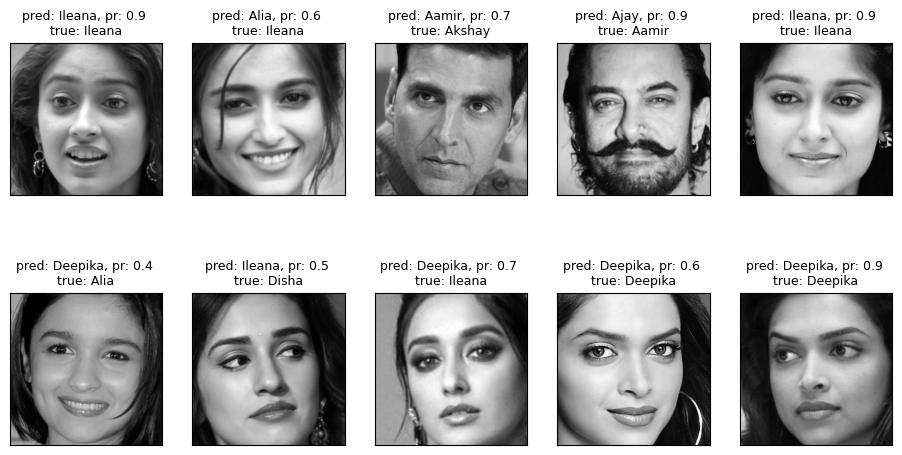

In [23]:
# Create prediction titles
prediction_titles = []
true_positive = 0

for i in range(len(y_pred)):
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = f"pred: {pred_name}, pr: {str(y_prob[i])[:3]} \ntrue: {true_name}"
    prediction_titles.append(result)
    
    if true_name == pred_name:
        true_positive += 1

accuracy = (true_positive * 100) / len(y_pred)
print(f"Accuracy: {accuracy:.2f}%")

# Plot the gallery (you can set n_row and n_col based on how many test images you want to show)
plot_gallery(X_test, prediction_titles, h, w, n_row=2, n_col=5)
plt.show()
